In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

import torch
from torch import nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [63]:
def f(x, y):
    noise = (rd.random()-.5) * 2
    return x**2 + y**3 + noise

In [64]:
x_train = [[(rd.random()-.5) * 5, (rd.random()-.5) * 5] for _ in range(100)]
y_train = [f(x[0], x[1]) for x in x_train]

x_test = [[(rd.random()-.5) * 5, (rd.random()-.5) * 5] for _ in range(20)]
y_test = [f(x[0], x[1]) for x in x_test]

In [65]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(self.__class__, self).__init__()
        self.linear1 = nn.Linear(2, 100)
        self.relu1 = nn.ReLU(100)
        self.linear2 = nn.Linear(100, 2)
        self.relu2 = nn.ReLU(2)
        self.linear3 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu2(x)
        res = self.linear3(x)
        return res

In [66]:
model = SimpleNN()
opt = torch.optim.Adam(model.parameters())
lr_sched = ReduceLROnPlateau(opt, factor=0.3)
criterion = nn.MSELoss()

In [67]:
x_train_batched = [x_train[i * 10:(i + 1) * 10] for i in range(len(x_train) // 10)]
y_train_batched = [y_train[i * 10:(i + 1) * 10] for i in range(len(x_train) // 10)]

x_test_batched = [x_test[i * 10:(i + 1) * 10] for i in range(len(x_test) // 10)]
y_test_batched = [y_test[i * 10:(i + 1) * 10] for i in range(len(x_test) // 10)]

loss_arr = []
loss_arr_test = []

In [72]:
ITER = 1000

for it in range(ITER):
    iter_loss = 0
    iter_loss_test = 0
    for i in range(len(x_train_batched)):
        x = x_train_batched[i]
        y = y_train_batched[i]
        
        x = torch.tensor(x)
        y = torch.tensor(y).view(-1, 1)
        
        pred = model.forward(x)
        
        loss = criterion(pred, y)
        iter_loss += loss.detach().numpy() / len(x)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
    loss_arr.append(iter_loss)
    
    for i in range(len(x_test_batched)):
        x = x_test_batched[i]
        y = y_test_batched[i]
        
        x = torch.tensor(x)
        y = torch.tensor(y).view(-1, 1)
        
        pred = model.forward(x)
        
        loss = criterion(pred, y)
        iter_loss_test += loss.detach().numpy() / len(x)
    
    loss_arr_test.append(iter_loss_test)

[0.15914814546704292, 0.15926043465733528, 0.1591615471988916, 0.1593056660145521, 0.15912656299769878]
[0.15506997108459475, 0.15518367886543272, 0.15539100766181946, 0.15493202805519105, 0.15487951040267944]


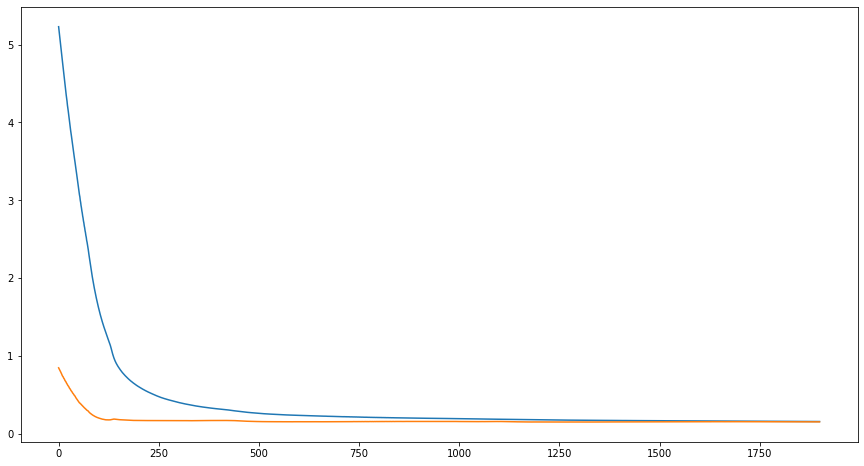

In [75]:
plt.figure(figsize=(15, 8))
plt.plot(loss_arr[100:])
plt.plot(loss_arr_test[100:])
print(loss_arr[-5:])
print(loss_arr_test[-5:])

In [74]:
model.forward(torch.tensor(x_train[10])), y_train[10]

(tensor([17.0102], grad_fn=<AddBackward0>), 17.41805018219678)